In [1]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

import bayes_opt.visualization.visualization_utility_cost as viz
from bayes_opt.test_functions import drl_experiments
from bayes_opt.utility.basic_utility_functions import evaluating_final_util_MaxEpoch,set_seed
from bayes_opt.curve_compression import return_logistic_curve

from bayes_opt.sequentialBO.boil import BOIL

from tqdm import tqdm
import warnings


warnings.filterwarnings("ignore")

set_seed(1337)


W1118 09:51:59.859382  9296 deprecation.py:323] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


# Specifying the search space

In [2]:
SearchSpace = OrderedDict([('gamma',(0.8,1)),("lr_actor", (1e-6,1e-2)),("lr_critic", (1e-6,1e-2)),
                      ('maxEpisodes',(200, 500))])

varParams = list(SearchSpace.keys())

# These are the fixed hyperparamters for DRL

In [3]:
fixedParams = OrderedDict([
        ("lr_actor", 5e-4),
        ("lr_critic", 5e-4),
        ("ent_coef", 0.01),
        ("maxSteps", 200),
        ("val_architecture", [32,32]),
        ("pol_architecture", [32,32])])

# Initializing the Advantage Actor Critic (A2C) on Reacher-v2 environment (require Mujoco license)

In [4]:
myfunction=drl_experiments.DRL_experiment("A2C", "Reacher-v2", varParams, fixedParams, SearchSpace)


# Initializing BOIL class

In [5]:
acq_name='ei_mu_max'

func_params={}
func_params['function']=myfunction

boil=BOIL(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

# Initializing BOIL with 10 points

In [6]:
n_init_points=10
print("initialization {} points - please wait...".format(n_init_points))
boil.init(n_init_points)

initialization 10 points - please wait...


W1118 09:52:02.270612  9296 deprecation.py:506] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\ops\linalg\linear_operator_diag.py:166: calling LinearOperator.__init__ (from tensorflow.python.ops.linalg.linear_operator) with graph_parents is deprecated and will be removed in a future version.
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


Max #augmented points 10 	 #augmented points  8 	 Augmented points:  [0.    0.106 0.245 0.365 0.5   0.654 0.783 0.905]
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []


# Running BOIL over multiple iterations

In [7]:
NN=10*myfunction.input_dim
print("Running BOIL for {} iterations".format(NN))
strFolderOut="run_experiments\plot"

for index in tqdm(range(0,NN)):
    boil.suggest_nextpoint()


Running BOIL for 40 iterations


  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.8662 0.917  0.0705 0.1463] acq val=log(Utility/Cost)= -0.1973
Max #augmented points 1 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9732 0.0092 0.0007] t=244 current y=60.18, ybest=356.07


  2%|██                                                                              | 1/40 [03:16<2:07:34, 196.28s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.571 1.    0.    0.   ] acq val=log(Utility/Cost)= -0.4733
[original scale] x=[0.9142 0.01   0.    ] t=200 current y=34.48, ybest=356.07


  5%|████                                                                            | 2/40 [05:56<1:57:26, 185.42s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [1. 0. 0. 0.] acq val=log(Utility/Cost)= -0.6639
[original scale] x=[1. 0. 0.] t=200 current y=30.76, ybest=356.07


  8%|██████                                                                          | 3/40 [08:36<1:49:42, 177.91s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0. 1. 0. 0.] acq val=log(Utility/Cost)= -0.7294
[original scale] x=[0.8  0.01 0.  ] t=200 current y=37.94, ybest=356.07


 10%|████████                                                                        | 4/40 [11:17<1:43:35, 172.65s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [1.     0.6312 0.     0.    ] acq val=log(Utility/Cost)= -1.4418
[original scale] x=[1.     0.0063 0.    ] t=200 current y=31.05, ybest=356.07


 12%|██████████                                                                      | 5/40 [13:57<1:38:35, 169.02s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.2794 1.     0.1625 0.    ] acq val=log(Utility/Cost)= -1.6563
[original scale] x=[0.8559 0.01   0.0016] t=200 current y=36.55, ybest=356.07


 15%|████████████                                                                    | 6/40 [16:39<1:34:29, 166.75s/it]

ln of conditioning number of GP covariance matrix 9.2
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=1.3 Logistic growth=0.8
selected point from acq func: [0.     1.     0.     0.6213] acq val=log(Utility/Cost)= -1.2254
Max #augmented points 6 	 #augmented points  4 	 Augmented points:  [0.    0.153 0.296 0.47 ]
[original scale] x=[0.8  0.01 0.  ] t=341 current y=145.01, ybest=356.07


 18%|██████████████                                                                  | 7/40 [21:57<1:56:38, 212.09s/it]

ln of conditioning number of GP covariance matrix 10.0
selected point from acq func: [0.0516 0.438  0.2536 1.    ] acq val=log(Utility/Cost)= -1.6142
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8103 0.0044 0.0025] t=500 current y=325.13, ybest=356.07


 20%|████████████████                                                                | 8/40 [28:33<2:22:39, 267.48s/it]

ln of conditioning number of GP covariance matrix 10.0
selected point from acq func: [0.3484 0.113  0.4265 0.8413] acq val=log(Utility/Cost)= -1.8736
Max #augmented points 8 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8697 0.0011 0.0043] t=452 current y=252.38, ybest=356.07


 22%|██████████████████                                                              | 9/40 [34:34<2:32:36, 295.36s/it]

ln of conditioning number of GP covariance matrix 10.0
selected point from acq func: [0.     0.     0.     0.6744] acq val=log(Utility/Cost)= -1.9319
Max #augmented points 6 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8 0.  0. ] t=402 current y=219.85, ybest=356.07


 25%|███████████████████▊                                                           | 10/40 [39:54<2:31:24, 302.82s/it]

ln of conditioning number of GP covariance matrix 10.0
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=1.1 Logistic growth=0.8
selected point from acq func: [0. 0. 0. 1.] acq val=log(Utility/Cost)= -1.779
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8 0.  0. ] t=500 current y=329.46, ybest=356.07


 28%|█████████████████████▋                                                         | 11/40 [46:39<2:41:12, 333.53s/it]

ln of conditioning number of GP covariance matrix 10.0
selected point from acq func: [0. 1. 1. 0.] acq val=log(Utility/Cost)= -2.2825
[original scale] x=[0.8  0.01 0.01] t=200 current y=30.87, ybest=356.07


 30%|███████████████████████▋                                                       | 12/40 [49:19<2:11:24, 281.60s/it]

ln of conditioning number of GP covariance matrix 10.0
selected point from acq func: [0.3378 1.     0.1959 1.    ] acq val=log(Utility/Cost)= -2.3475
Max #augmented points 10 	 #augmented points  5 	 Augmented points:  [0.    0.211 0.5   0.774 1.   ]
[original scale] x=[0.8676 0.01   0.002 ] t=500 current y=313.28, ybest=356.07


 32%|█████████████████████████▋                                                     | 13/40 [55:58<2:22:31, 316.71s/it]

ln of conditioning number of GP covariance matrix 10.2
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=0.6 Logistic growth=0.8
selected point from acq func: [0.5389 1.     0.5602 0.    ] acq val=log(Utility/Cost)= -0.3017
[original scale] x=[0.9078 0.01   0.0056] t=200 current y=35.35, ybest=356.07


 35%|███████████████████████████▋                                                   | 14/40 [58:46<1:57:56, 272.16s/it]

ln of conditioning number of GP covariance matrix 10.2
selected point from acq func: [0.3027 0.     0.     1.    ] acq val=log(Utility/Cost)= -2.424
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8605 0.     0.    ] t=500 current y=343.05, ybest=356.07


 38%|████████████████████████████▉                                                | 15/40 [1:05:20<2:08:36, 308.67s/it]

ln of conditioning number of GP covariance matrix 10.2
selected point from acq func: [0.7158 0.6143 0.3951 1.    ] acq val=log(Utility/Cost)= -2.6739
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9432 0.0061 0.004 ] t=500 current y=304.03, ybest=356.07


 40%|██████████████████████████████▊                                              | 16/40 [1:11:56<2:13:53, 334.75s/it]

ln of conditioning number of GP covariance matrix 10.2
selected point from acq func: [1.     0.3313 1.     0.    ] acq val=log(Utility/Cost)= -2.6504
[original scale] x=[1.     0.0033 0.01  ] t=200 current y=30.52, ybest=356.07


 42%|████████████████████████████████▋                                            | 17/40 [1:14:37<1:48:18, 282.55s/it]

ln of conditioning number of GP covariance matrix 10.2
selected point from acq func: [0.5551 0.6868 0.8878 1.    ] acq val=log(Utility/Cost)= -2.718
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.911  0.0069 0.0089] t=500 current y=295.51, ybest=356.07


 45%|██████████████████████████████████▋                                          | 18/40 [1:21:13<1:56:07, 316.72s/it]

ln of conditioning number of GP covariance matrix 10.2
selected point from acq func: [0.2481 0.6917 0.2723 1.    ] acq val=log(Utility/Cost)= -2.723
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8496 0.0069 0.0027] t=500 current y=305.34, ybest=356.07


 48%|████████████████████████████████████▌                                        | 19/40 [1:27:48<1:59:04, 340.19s/it]

ln of conditioning number of GP covariance matrix 10.2
selected point from acq func: [0.4968 0.3985 0.6761 1.    ] acq val=log(Utility/Cost)= -2.1877
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8994 0.004  0.0068] t=500 current y=325.18, ybest=356.07


 50%|██████████████████████████████████████▌                                      | 20/40 [1:34:24<1:58:58, 356.94s/it]

ln of conditioning number of GP covariance matrix 10.2
selected point from acq func: [0.2216 0.2486 0.     1.    ] acq val=log(Utility/Cost)= -2.4337
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8443 0.0025 0.    ] t=500 current y=305.53, ybest=356.07


 52%|████████████████████████████████████████▍                                    | 21/40 [1:40:59<1:56:39, 368.39s/it]

ln of conditioning number of GP covariance matrix 10.3
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=0.9 Logistic growth=1.0
selected point from acq func: [0.     1.     0.0872 1.    ] acq val=log(Utility/Cost)= -2.3766
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.01   0.0009] t=500 current y=340.66, ybest=356.07


 55%|██████████████████████████████████████████▎                                  | 22/40 [1:47:45<1:53:54, 379.71s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [1.     1.     0.8894 1.    ] acq val=log(Utility/Cost)= -2.5505
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[1.     0.01   0.0089] t=500 current y=278.88, ybest=356.07


 57%|████████████████████████████████████████████▎                                | 23/40 [1:54:20<1:48:50, 384.15s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [0.4224 0.3318 0.3251 1.    ] acq val=log(Utility/Cost)= -2.7024
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8845 0.0033 0.0033] t=500 current y=326.57, ybest=356.07


 60%|██████████████████████████████████████████████▏                              | 24/40 [2:00:54<1:43:16, 387.28s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [0.     0.1843 0.511  1.    ] acq val=log(Utility/Cost)= -1.7932
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0018 0.0051] t=500 current y=328.20, ybest=356.07


 62%|████████████████████████████████████████████████▏                            | 25/40 [2:07:29<1:37:21, 389.42s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [0. 0. 1. 0.] acq val=log(Utility/Cost)= -2.3391
[original scale] x=[0.8  0.   0.01] t=200 current y=20.78, ybest=356.07


 65%|██████████████████████████████████████████████████                           | 26/40 [2:10:09<1:14:47, 320.56s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [0.2726 0.4427 0.6335 1.    ] acq val=log(Utility/Cost)= -2.9916
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8545 0.0044 0.0063] t=500 current y=341.56, ybest=356.07


 68%|███████████████████████████████████████████████████▉                         | 27/40 [2:16:43<1:14:16, 342.79s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [1.     0.6037 1.     1.    ] acq val=log(Utility/Cost)= -3.1332
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.158 0.356 0.513 0.718 0.842]
[original scale] x=[1.    0.006 0.01 ] t=453 current y=243.98, ybest=356.07


 70%|█████████████████████████████████████████████████████▉                       | 28/40 [2:23:14<1:11:25, 357.10s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [0.     0.     0.2534 1.    ] acq val=log(Utility/Cost)= -2.6818
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.     0.0025] t=500 current y=340.50, ybest=356.07


 72%|███████████████████████████████████████████████████████▊                     | 29/40 [2:29:48<1:07:31, 368.35s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [1. 0. 1. 1.] acq val=log(Utility/Cost)= -3.5166
Max #augmented points 10 	 #augmented points  7 	 Augmented points:  [0.    0.153 0.339 0.505 0.713 0.842 1.   ]
[original scale] x=[1.   0.   0.01] t=500 current y=275.22, ybest=356.07


 75%|█████████████████████████████████████████████████████████▊                   | 30/40 [2:36:23<1:02:42, 376.25s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [0.4224 0.4942 0.5893 0.7394] acq val=log(Utility/Cost)= -3.77
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8845 0.0049 0.0059] t=422 current y=257.42, ybest=356.07


 78%|█████████████████████████████████████████████████████████████▏                 | 31/40 [2:41:56<54:29, 363.31s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [0.     0.79   0.0005 1.    ] acq val=log(Utility/Cost)= -3.018
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0079 0.    ] t=500 current y=334.95, ybest=356.07


 80%|███████████████████████████████████████████████████████████████▏               | 32/40 [2:48:31<49:42, 372.76s/it]

ln of conditioning number of GP covariance matrix 10.3
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=0.9 Logistic growth=1.0
selected point from acq func: [0.5382 1.     0.311  0.    ] acq val=log(Utility/Cost)= -0.1731
[original scale] x=[0.9076 0.01   0.0031] t=200 current y=17.88, ybest=356.07


 82%|█████████████████████████████████████████████████████████████████▏             | 33/40 [2:51:29<36:39, 314.26s/it]

ln of conditioning number of GP covariance matrix 10.3
selected point from acq func: [0.2111 0.317  0.4184 1.    ] acq val=log(Utility/Cost)= -3.5169
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8422 0.0032 0.0042] t=500 current y=318.99, ybest=356.07


 85%|███████████████████████████████████████████████████████████████████▏           | 34/40 [2:58:03<33:50, 338.40s/it]

ln of conditioning number of GP covariance matrix 10.4
selected point from acq func: [0.     0.4192 1.     1.    ] acq val=log(Utility/Cost)= -2.5139
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0042 0.01  ] t=500 current y=339.46, ybest=356.07


 88%|█████████████████████████████████████████████████████████████████████▏         | 35/40 [3:04:38<29:36, 355.34s/it]

ln of conditioning number of GP covariance matrix 10.4
selected point from acq func: [0.     0.0682 1.     1.    ] acq val=log(Utility/Cost)= -2.9841
Max #augmented points 10 	 #augmented points  5 	 Augmented points:  [0.    0.202 0.49  0.768 1.   ]
[original scale] x=[0.8    0.0007 0.01  ] t=500 current y=335.23, ybest=356.07


 90%|███████████████████████████████████████████████████████████████████████        | 36/40 [3:11:13<24:29, 367.26s/it]

ln of conditioning number of GP covariance matrix 10.4
selected point from acq func: [0.4774 0.5712 0.6082 1.    ] acq val=log(Utility/Cost)= -3.2675
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8955 0.0057 0.0061] t=500 current y=339.75, ybest=356.07


 92%|█████████████████████████████████████████████████████████████████████████      | 37/40 [3:17:48<18:46, 375.50s/it]

ln of conditioning number of GP covariance matrix 10.4
selected point from acq func: [0.238  0.3731 1.     1.    ] acq val=log(Utility/Cost)= -2.6082
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8476 0.0037 0.01  ] t=500 current y=340.55, ybest=356.07


 95%|███████████████████████████████████████████████████████████████████████████    | 38/40 [3:24:20<12:40, 380.45s/it]

ln of conditioning number of GP covariance matrix 10.4
selected point from acq func: [0.     0.281  0.8642 1.    ] acq val=log(Utility/Cost)= -2.909
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0028 0.0086] t=500 current y=320.27, ybest=356.07


 98%|█████████████████████████████████████████████████████████████████████████████  | 39/40 [3:30:55<06:24, 384.71s/it]

ln of conditioning number of GP covariance matrix 10.4
selected point from acq func: [0.1917 0.6357 1.     1.    ] acq val=log(Utility/Cost)= -2.3863
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8383 0.0064 0.01  ] t=500 current y=330.97, ybest=356.07


100%|███████████████████████████████████████████████████████████████████████████████| 40/40 [3:37:29<00:00, 387.51s/it]


# We evaluate the final performance score util MaxEpoch. The final utility score is marginalizing with different choices for the Logisic curve.

100%|██████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<?, ?it/s]


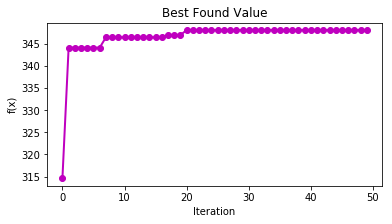

In [8]:
boil.Y_original=evaluating_final_util_MaxEpoch(boil)
viz.show_optimization_progress(boil)

# Plot the training curve of the best found hyperparameter

Best found hyperparameter = [1.       0.000001 0.000001]


Text(0.5, 1.0, 'Training curve of best found hyperparameter')

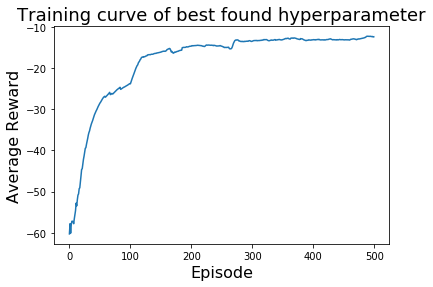

In [9]:
# select the optimal hyperparameter
idxMax=np.argmax(boil.Y_original)
print("Best found hyperparameter =",boil.X_original[idxMax])

# play the best parameter to Max Iteration
T_max=boil.SearchSpace[-1,1]

curve,time=myfunction.func([boil.X_original[idxMax,:-1],T_max])
curve=curve[0]
average100_curve=[np.mean( curve[max(0,n-100):n+1] )     for n in range(len(curve)) ]

# plot the found curve
fig=plt.figure()
plt.plot(average100_curve)
plt.xlabel('Episode',fontsize=16)
plt.ylabel('Average Reward',fontsize=16)
plt.title("Training curve of best found hyperparameter",fontsize=18)


# Play the Reacher environment using the best found hyperparameter

In [10]:
boil.X_original[idxMax]

array([1.      , 0.000001, 0.000001])

# Plot the Conditioning number of the GP covariance matrix

Text(0, 0.5, 'Log of Cond Number of Cov Matrix')

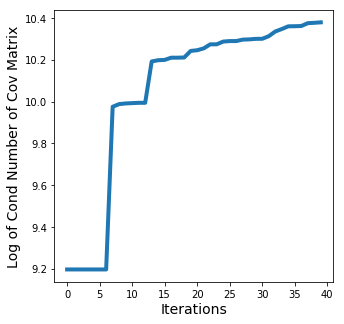

In [11]:
fig=plt.figure(figsize=(5,5))
plt.plot(np.log(boil.condition_number),linewidth=4)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Log of Cond Number of Cov Matrix',fontsize=14)

# Plot the estimated preference function

Text(0.5, 1.0, 'Estimated Logistic Curve $m_0$=0.9 $g_0$=1.0')

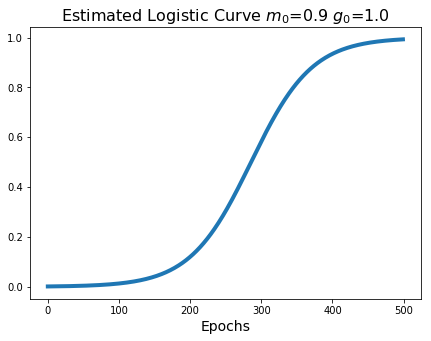

In [12]:
estimated_curve=return_logistic_curve(midpoint=boil.gp.logistic_hyper['midpoint'], 
                                      growth=boil.gp.logistic_hyper['growth'],
                                      MaxEpoch=SearchSpace['maxEpisodes'][1])

fig=plt.figure(figsize=(7,5))
plt.plot(estimated_curve,linewidth=4)
plt.xlabel('Epochs',fontsize=14)
plt.xlabel('Epochs',fontsize=14)

strTitle="Estimated Logistic Curve $m_0$={:.1f} $g_0$={:.1f}".format(boil.gp.logistic_hyper['midpoint'],boil.gp.logistic_hyper['growth'])
plt.title(strTitle,fontsize=16)